In [1]:
# PROYEK ANALISIS DATA : BIKE SHARING
# Nama: Duevano Fairuz Pandya
# Email: duevanofairuz@gmail.com
# ID Dicoding: duevanofairuz

In [2]:
# Menentukan Pertanyaan Bisnis
# 1. Bagaimana pengaruh temperatur udara terhadap penggunaan sepeda?
# 2. Bagaimana perkembangan casual dan registered user selama 2 tahun ini?
# 3. Bagaimana perbedaan penggunaan sepeda di tiap harinya untuk setiap tahun?( Hari apa yang paling laris? )

In [3]:
# Penjelasan Dataset
# Baik file hour.csv maupun day.csv memiliki kolom-kolom berikut, kecuali kolom “hr” yang tidak tersedia dalam day.csv:

# instant: indeks record
# dteday:  tanggal
# season:  musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)
# yr:      tahun (0: 2011, 1: 2012)
# mnth:    bulan (1 hingga 12)
# hr:      jam (0 hingga 23)
# holiday: apakah hari cuaca merupakan hari libur atau bukan (diekstraksi dari http://dchr.dc.gov/page/holiday-schedule)
# weekday: hari dalam seminggu
# workingday: jika hari bukan akhir pekan atau hari libur, nilainya 1, jika bukan, nilainya 0.
# weathersit:
# 1: Cerah, sedikit awan, sebagian berawan, sebagian berawan
# 2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
# 3: Salju ringan, Hujan ringan + Badai petir + Awan tersebar, Hujan ringan + Awan tersebar
# 4: Hujan deras + Es + Badai petir + Kabut, Salju + Kabut
# temp:   Suhu terstandarisasi dalam derajat Celsius. Nilainya dibagi dengan 41 (maksimum)
# atemp:  Suhu perasaan terstandarisasi dalam derajat Celsius. Nilainya dibagi dengan 50 (maksimum)
# hum:    Kelembaban terstandarisasi. Nilainya dibagi dengan 100 (maksimum)
# windspeed:   Kecepatan angin terstandarisasi. Nilainya dibagi dengan 67 (maksimum)
# casual:      jumlah pengguna sewa kasual
# registered:  jumlah pengguna terdaftar
# cnt:         jumlah total sepeda sewa termasuk pengguna kasual dan terdaftar

In [4]:
# Install dependencies
pip install ./requirements.txt

SyntaxError: invalid syntax (3572868328.py, line 2)

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import warnings
from babel.numbers import format_currency
sns.set(style='dark')

In [5]:
# Data Wrangling

In [6]:
# A. Gathering Data

In [58]:
#hour_df
hour_df = pd.read_csv('./data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [102]:
#day_df
day_df = pd.read_csv('./data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [60]:
# B. Assessing Data

In [61]:
# assessing hour_df

In [62]:
# mengecek isi entry data untuk setiap kolomnya
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [63]:
#cek missing value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [64]:
#cek duplikasi data
print("Jumlah record hour_df yang terduplikasi: ", hour_df.duplicated().sum())

Jumlah record hour_df yang terduplikasi:  0


In [65]:
#mengecek descriptive statistics dari hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [66]:
# Yang perlu di cleaning dari hour_df:
# - Format date masih bertipe object padahal seharusnya bertipe datetime
# - kolom season, yr, dan weekday dapat diganti menjadi string untuk keperluan visualisasi

In [67]:
# assessing day_df

In [68]:
# mengecek isi entry data untuk setiap kolomnya
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [69]:
#cek missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [70]:
#cek duplikasi data
print("Jumlah record day_df yang terduplikasi: ", day_df.duplicated().sum())

Jumlah record day_df yang terduplikasi:  0


In [71]:
#mengecek descriptive statistics dari day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [72]:
#mengecek apakah weathersit memang tidak ada yang berindeks 4 (Hujan deras + Es + Badai petir + Kabut, Salju + Kabut)
print(day_df[day_df.weathersit == 4])

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [73]:
# Yang perlu di cleaning dari day_df:
# - Format date masih bertipe object padahal seharusnya bertipe datetime
# - kolom season, yr, dan weekday dapat diganti menjadi string untuk keperluan visualisasi

In [74]:
# C. Cleaning Data

In [75]:
# cleaning hour_df (mengubah tipe data dteday menjadi datetime)

In [76]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [77]:
#cleaning day_df (mengubah tipe data dteday menjadi datetime)

In [103]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [79]:
# Exploratory Data Analysis (EDA)

In [80]:
# A. Explore hour_df

In [81]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [82]:
#melihat korelasi antar variabel yang ingin di eksplor
hour_df.corr()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.999995,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
dteday,0.999995,1.000000,0.404452,0.865648,0.489808,-0.006161,0.014737,0.001372,-0.003366,-0.014063,0.136074,0.137543,0.010196,-0.074645,0.157821,0.281450,0.277753
season,0.404046,0.404452,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,0.865648,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.489808,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006161,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,0.014737,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,0.001372,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,-0.003366,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014063,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426


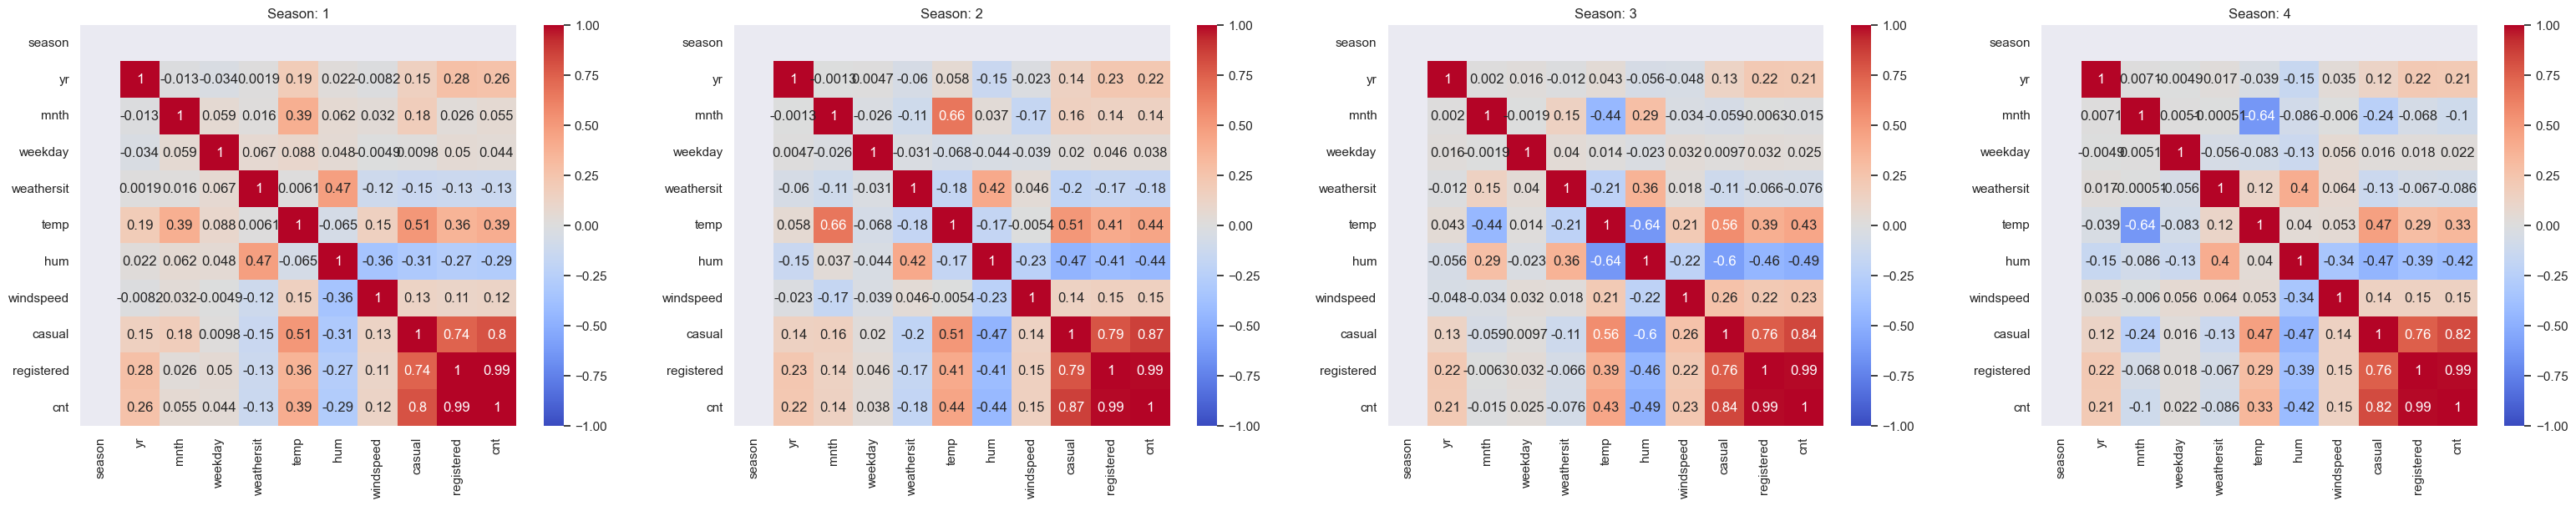

In [83]:
#tampilan heatmap dari korelasi antar variabel
variable_df = hour_df[['season','yr','mnth','weekday','weathersit','temp','hum','windspeed','casual','registered','cnt']]

fig, axes = plt.subplots(1, 4, figsize=(15, 6))  

# iterasi untuk setiap season yang ada (spring, summer, autumn, winter)
for i, season_value in enumerate(variable_df["season"].unique()):
    season_name =  season_value 

    # filter data untuk season sekarang
    season_data = variable_df[variable_df["season"] == season_value]

    # plot heatmap untuk setiap season
    corr_matrix = season_data.corr(numeric_only=True, method='spearman')
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=axes[i])
    axes[i].set_title(f"Season: {season_name}")

plt.subplots_adjust(left=1, right=3, top=0.9, bottom=0.1) 

plt.show()

In [84]:
# berikut ini adalah beberapa variabel yang saling berkorelasi berdasarkan pengecekan di atas
# humidity - weathersit
# cnt - temp
# cnt - month
# weekday - cnt
# dsb.
# hal ini menunjukkan variabel2 yang diperlukan oleh pertanyaan2 sebelumnya 
# ternyata bisa dianalisis karena memiliki korelasi satu sama lain

In [85]:
#untuk melihat perbandingan pengguna sepeda tiap jam di tiap harinya
hour_df.groupby(by="weekday").agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': ['mean', 'max', 'min']
})

casual  registered         cnt         
              mean        mean        mean  max min
weekday                                            
0        56.163469  121.305356  177.468825  776   1
1        28.553449  155.191206  183.744655  968   1
2        23.580514  167.658377  191.238891  970   1
3        23.159192  167.971313  191.130505  977   1
4        24.872521  171.564144  196.436665  976   1
5        31.458786  164.677121  196.135907  957   1
6        61.246815  128.962978  190.209793  783   1

In [86]:
#pengaruh temperatur udara terhadap pengguna sepeda di setiap jam nya
hour_df.groupby(by="temp").agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': 'mean'
})

,casual,registered,cnt
temp,,,
0.02,0.941176,40.941176,41.882353
0.04,1.750000,33.875000,35.625000
0.06,2.750000,39.250000,42.000000
0.08,1.941176,26.294118,28.235294
0.10,1.666667,47.627451,49.294118
0.12,2.223684,56.197368,58.421053
0.14,2.434783,52.673913,55.108696
0.16,3.486957,62.091304,65.578261
0.18,3.309677,56.806452,60.116129


In [97]:
# Menghitung rata-rata jumlah pengguna sepeda berdasarkan suhu (pertanyaan nomor 1)
warnings.simplefilter(action='ignore', category=FutureWarning)
temperature_df = hour_df.groupby(pd.cut(hour_df['temp'], bins=10)).agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': 'mean'
}).reset_index()

temperature_df

,temp,casual,registered,cnt
0,"(0.019, 0.118]",1.760684,40.529915,42.290598
1,"(0.118, 0.216]",3.422875,64.442812,67.865687
2,"(0.216, 0.314]",7.980360,84.851882,92.832242
3,"(0.314, 0.412]",18.585994,129.847580,148.433574
4,"(0.412, 0.51]",31.255240,144.630086,175.885327
5,"(0.51, 0.608]",40.364382,171.335693,211.700075
6,"(0.608, 0.706]",47.246349,178.087302,225.333651
7,"(0.706, 0.804]",76.321356,240.744939,317.066296
8,"(0.804, 0.902]",84.595200,246.179200,330.774400
9,"(0.902, 1.0]",71.583333,221.226190,292.809524


In [88]:
#menjawab pertanyaan nomor 2
monthly_users_df = hour_df.groupby(['yr', 'mnth']).agg({
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()

monthly_users_df[monthly_users_df['yr'] == 0]

,yr,mnth,casual,registered
0,0,1,3073,35116
1,0,2,6242,41973
2,0,3,12826,51219
3,0,4,22346,72524
4,0,5,31050,104771
5,0,6,30612,112900
6,0,7,36452,104889
7,0,8,28842,107849
8,0,9,26545,100873
9,0,10,25222,98289


In [134]:
# Menghitung total pengguna sepeda (casual dan terdaftar) untuk setiap hari dalam seminggu. Menjawab pertanyaan nomor 3
daily_users_df = hour_df.groupby(['yr', 'weekday']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()

daily_users_df[daily_users_df['yr']==1]

,yr,weekday,casual,registered,cnt
7,1,0,80918,186035,266953
8,1,1,39224,236058,275282
9,1,2,33854,254917,288771
10,1,3,36659,267220,303879
11,1,4,39020,271823,310843
12,1,5,48785,256999,305784
13,1,6,94305,203759,298064


In [90]:
# B. Explore day_df

In [91]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [92]:
#melihat korelasi antar variabel yang ingin di eksplor
day_df.corr()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
dteday,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494


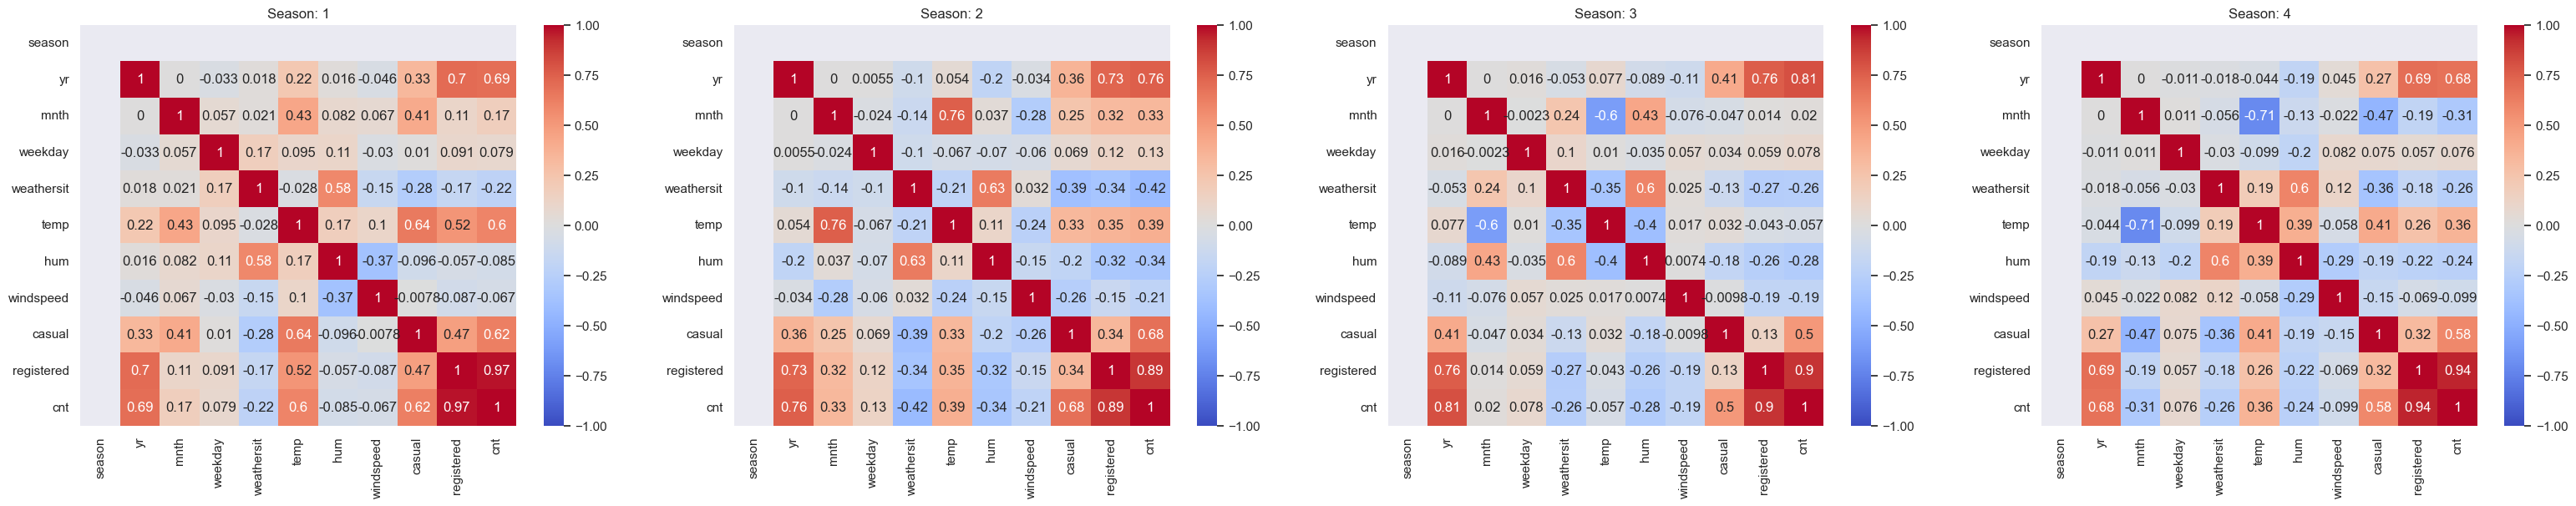

In [93]:
#tampilan heatmap dari korelasi antar variabel
variable_df = day_df[['season','yr','mnth','weekday','weathersit','temp','hum','windspeed','casual','registered','cnt']]

fig, axes = plt.subplots(1, 4, figsize=(15, 6))  

# iterasi untuk setiap season yang ada (spring, summer, autumn, winter)
for i, season_value in enumerate(variable_df["season"].unique()):
    season_name =  season_value 

    # filter data untuk season sekarang
    season_data = variable_df[variable_df["season"] == season_value]

    # plot heatmap untuk setiap season
    corr_matrix = season_data.corr(numeric_only=True, method='spearman')
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=axes[i])
    axes[i].set_title(f"Season: {season_name}")

plt.subplots_adjust(left=1, right=3, top=0.9, bottom=0.1) 

plt.show()

In [ ]:
# Visualization & Explanatory Analysis

In [ ]:
# formatting hour_df

In [ ]:
#mengubah format season menjadi string
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Autumn', 4: 'Winter'}
hour_df['season'] = hour_df['season'].replace(season_mapping)\

#mengubah format yr menjadi string
yr_mapping = {0: '2011', 1: '2012'}
hour_df['yr'] = hour_df['yr'].replace(yr_mapping)

#mengubah format weekday menjadi string
day_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
hour_df['weekday'] = hour_df['weekday'].replace(day_mapping)

hour_df.sample(10)

In [ ]:
# formatting day_df

In [116]:
#mengubah format season menjadi string
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Autumn', 4: 'Winter'}
day_df['season'] = day_df['season'].replace(season_mapping)

#mengubah format yr menjadi string
yr_mapping = {0: '2011', 1: '2012'}
day_df['yr'] = day_df['yr'].replace(yr_mapping)

#mengubah format weekday menjadi string
day_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
day_df['weekday'] = day_df['weekday'].replace(day_mapping)

day_df.sample(10)


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2012-02-13,409,Spring,2012,2,0,Monday,1,1,0.222500,0.227913,0.411250,0.167283,94,3328,3422
2011-12-24,358,Spring,2011,12,0,Saturday,0,1,0.302500,0.299242,0.542500,0.190304,155,856,1011
2012-12-11,711,Winter,2012,12,0,Tuesday,1,2,0.353333,0.338363,0.596667,0.296037,282,5219,5501
2011-01-02,2,Spring,2011,1,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-08-20,232,Autumn,2011,8,0,Saturday,0,1,0.697500,0.648996,0.674167,0.104467,1914,3277,5191
2012-09-24,633,Winter,2012,9,0,Monday,1,1,0.514167,0.502513,0.492917,0.142404,1001,6435,7436
2011-06-13,164,Summer,2011,6,0,Monday,1,1,0.635000,0.601654,0.494583,0.305350,863,4157,5020
2012-03-22,447,Summer,2012,3,0,Thursday,1,1,0.554167,0.531567,0.831250,0.117562,1334,5537,6871
2011-06-25,176,Autumn,2011,6,0,Saturday,0,1,0.695000,0.643313,0.483333,0.209571,1782,3420,5202


In [ ]:
# Menjawab Pertanyaan 1: Bagaimana pengaruh temperatur udara terhadap penggunaan sepeda?

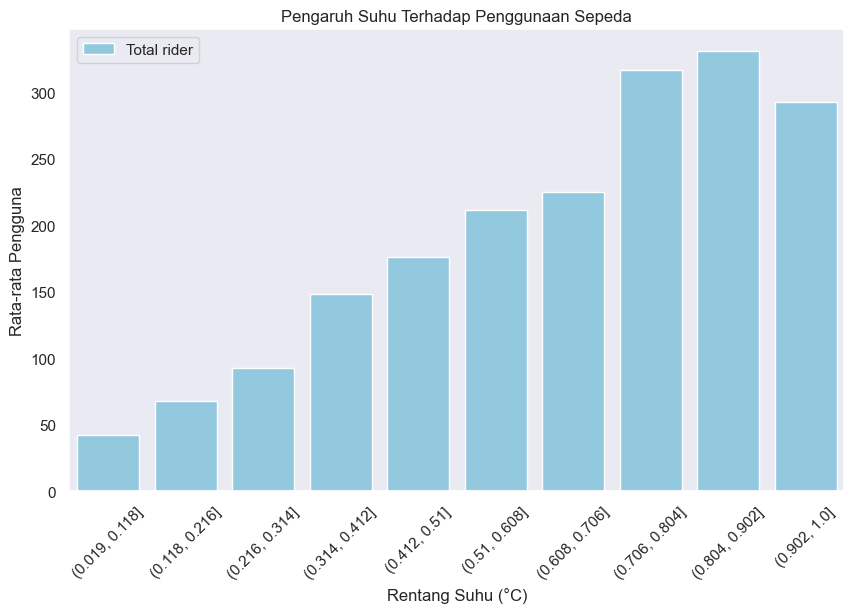

In [98]:
# Buat bar chart untuk cnt - temp
plt.figure(figsize=(10, 6))
sns.barplot(x='temp', y='cnt', data=temperature_df, color='skyblue', label='Total rider')
# sns.barplot(x='temp', y='registered', data=temperature_df, palette='Oranges', label='Registered Users')

# Tambahkan judul dan label sumbu
plt.title('Pengaruh Suhu Terhadap Penggunaan Sepeda')
plt.xlabel('Rentang Suhu (°C)')
plt.ylabel('Rata-rata Pengguna')
plt.xticks(rotation=45)

# Tampilkan legenda
plt.legend()

# Tampilkan chart
plt.show()

In [104]:
# Menjawab pertanyaan nomor 2: Bagaimana perkembangan casual dan registered user selama 2 tahun ini?
# Set 'dteday' sebagai index
day_df.set_index('dteday', inplace=True)

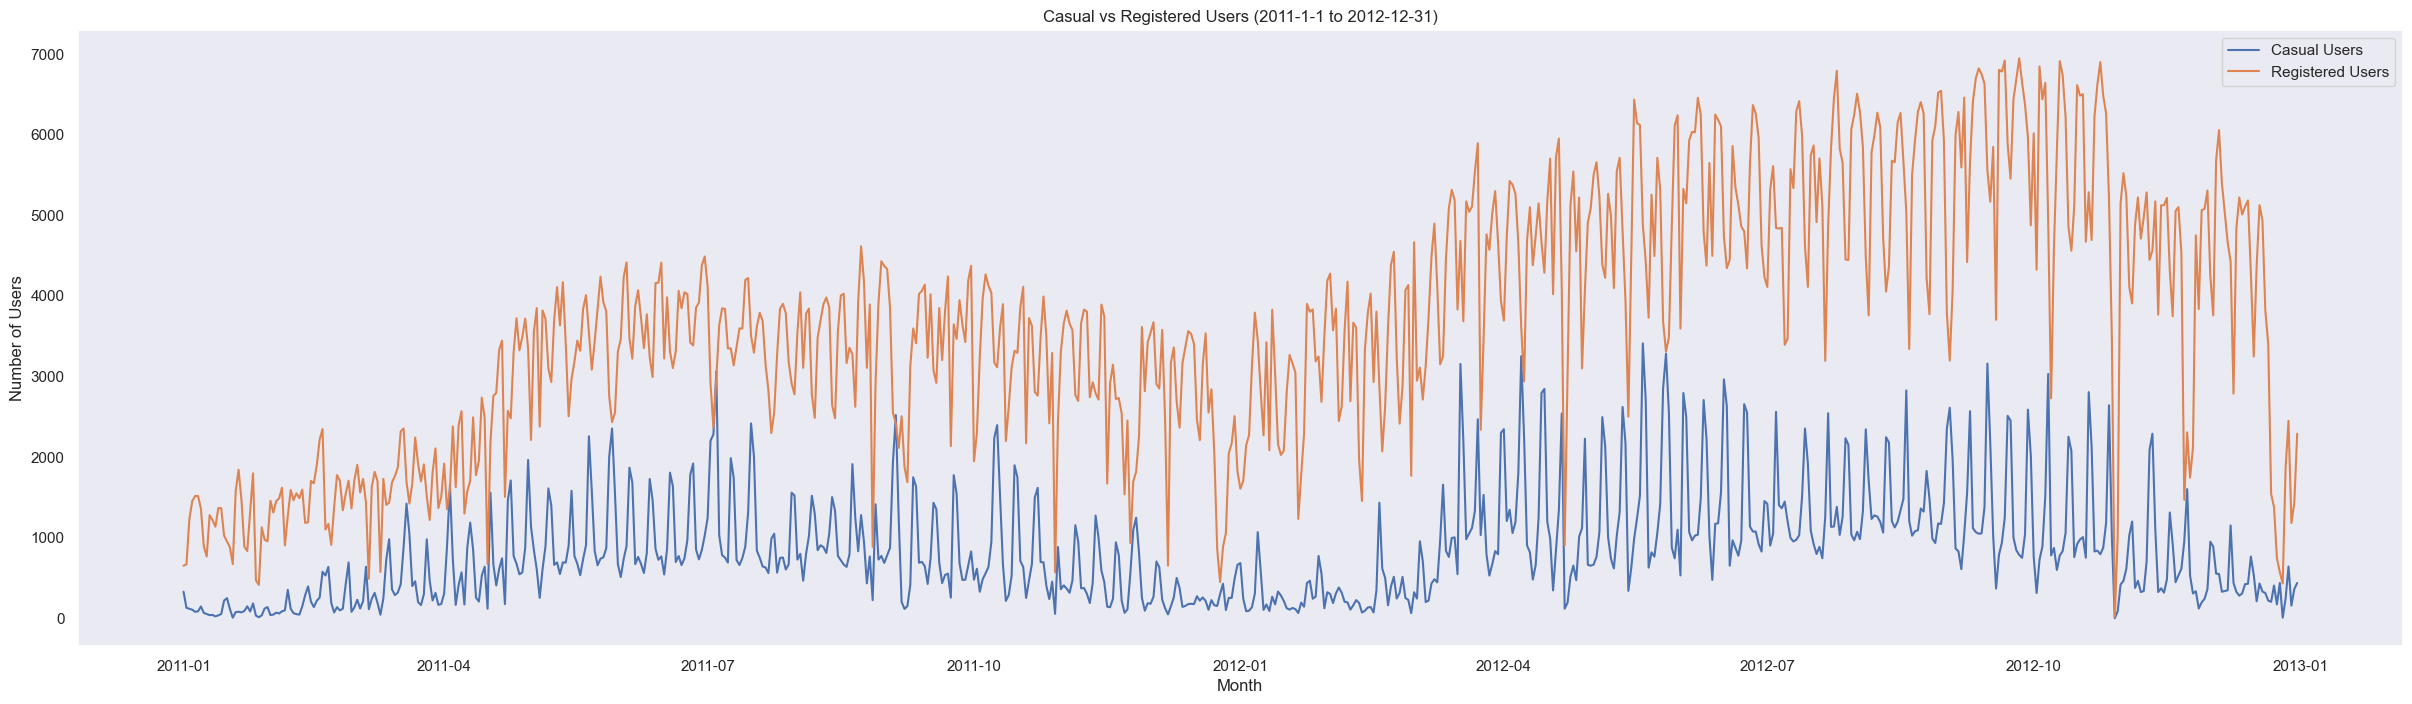

In [115]:
# Plot data
plt.figure(figsize=(30, 8))
plt.plot(day_df['casual'], label='Casual Users')
plt.plot(day_df['registered'], label='Registered Users')

# Judul dan label
plt.title('Casual vs Registered Users (2011-1-1 to 2012-12-31)')
plt.xlabel('Month')
plt.ylabel('Number of Users')

# Tampilkan legenda
plt.legend()

# Tampilkan plot
plt.show()

In [ ]:
# Menjawab pertanyaan nomor 3: Bagaimana perbedaan penggunaan sepeda di tiap harinya untuk setiap tahun?( Hari apa yang paling laris? )

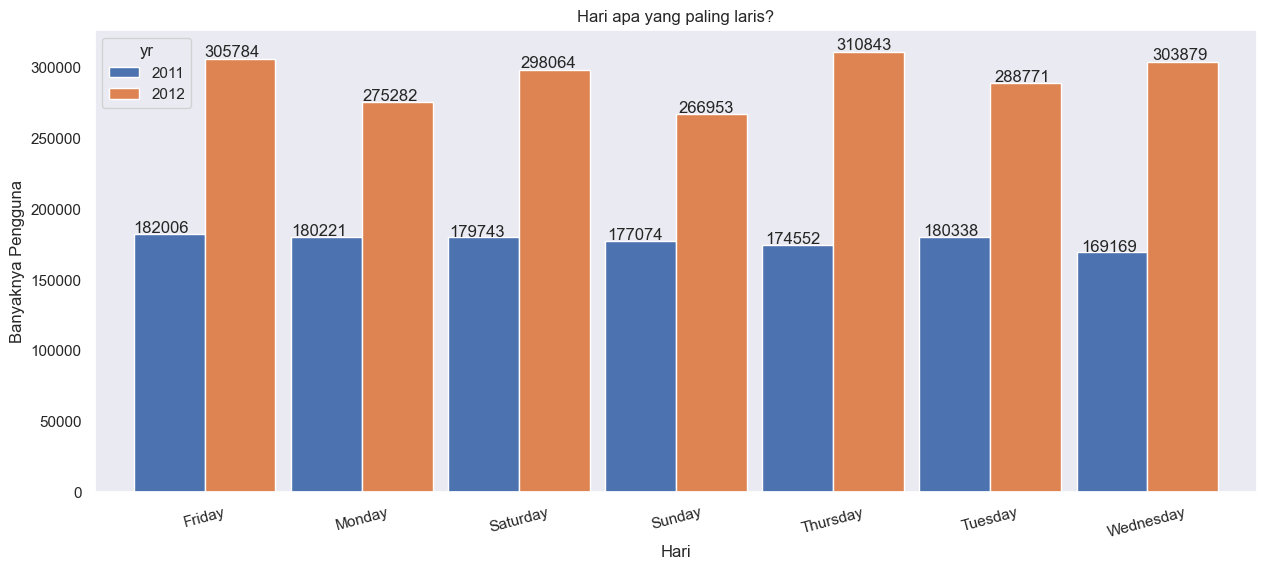

In [145]:
# Buat DataFrame baru yang mengelompokkan data berdasarkan 'weekday' dan 'yr', dan menghitung total 'cnt'
grouped = day_df.groupby(['weekday', 'yr'])['cnt'].sum().reset_index()

# Urutkan DataFrame berdasarkan 'cnt' secara descending
grouped.sort_values('cnt', ascending=False, inplace=True)

# Buat pivot table dari DataFrame yang dikelompokkan
pivot = grouped.pivot(index='weekday', columns='yr', values='cnt')

# Buat plot dengan ukuran figure yang diinginkan
ax = pivot.plot(kind='bar', stacked=False, figsize=(15, 6), width=0.9)

# Atur judul dan label sumbu
plt.title('Hari apa yang paling laris?')
plt.xlabel('Hari')
plt.ylabel('Banyaknya Pengguna')
plt.xticks(rotation=15)

# Tambahkan nilai di atas masing-masing bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Tampilkan plot
plt.show()

In [ ]:
# 1. Bagaimana pengaruh temperatur udara terhadap penggunaan sepeda?
# 2. Bagaimana perkembangan casual dan registered user selama 2 tahun ini?
# 3. Bagaimana perbedaan penggunaan sepeda di tiap harinya untuk setiap tahun?( Hari apa yang paling laris? )

# CONCLUSION
# 1. Pengguna lebih menyukai penggunaan sepeda ketika suhu sedang hangat
# 2. Terdapat peningkatan pengguna (registered) yang signifikan dari tahun 2011 ke tahun 2012, hal ini menunjukkan sistem bike sharing ini cukup efektif
# 3. Untuk tahun 2011 pengguna paling banyak adalah ketika hari selasa sedangkan pada tahun 2012 adalah hari kamis, hal ini sangat didominasi oleh beberapa faktor seperti hari libur dan cuaca setiap tahun

# Adapun beberapa poin menarik yang bisa dilihat dari hasil analisis ini:
# Berdasarkan data, cuaca dan hari libur atau akhir pekan berpengaruh pada jumlah penumpang sistem berbagi sepeda. 
# Suhu tinggi meningkatkan jumlah penumpang, sedangkan kelembaban tinggi menurunkannya. 
# Di hari kerja, perjalanan santai lebih sedikit karena banyak pengguna yang berangkat kerja, menciptakan dua puncak kepadatan pengguna. 
# Di hari libur, pola penumpang berbeda yakni hanya satu puncak kepadatan pengguna.